In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling
import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("vgsales.csv")

# EDA

In [4]:
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN  
5           NaN           NaN        NaN         NaN       NaN    NaN  
6          89.0          65.0        8.5       431.0  Nintendo      E  
7          58.0          41.0        6.6       129.0  Nintendo      E  
8          87.0          80.0        8.4       594.0  Nintendo      E  
9           NaN           NaN        NaN         NaN       NaN    NaN

In [5]:
df.shape

(16719, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.duplicated().sum()

0

<Axes: >

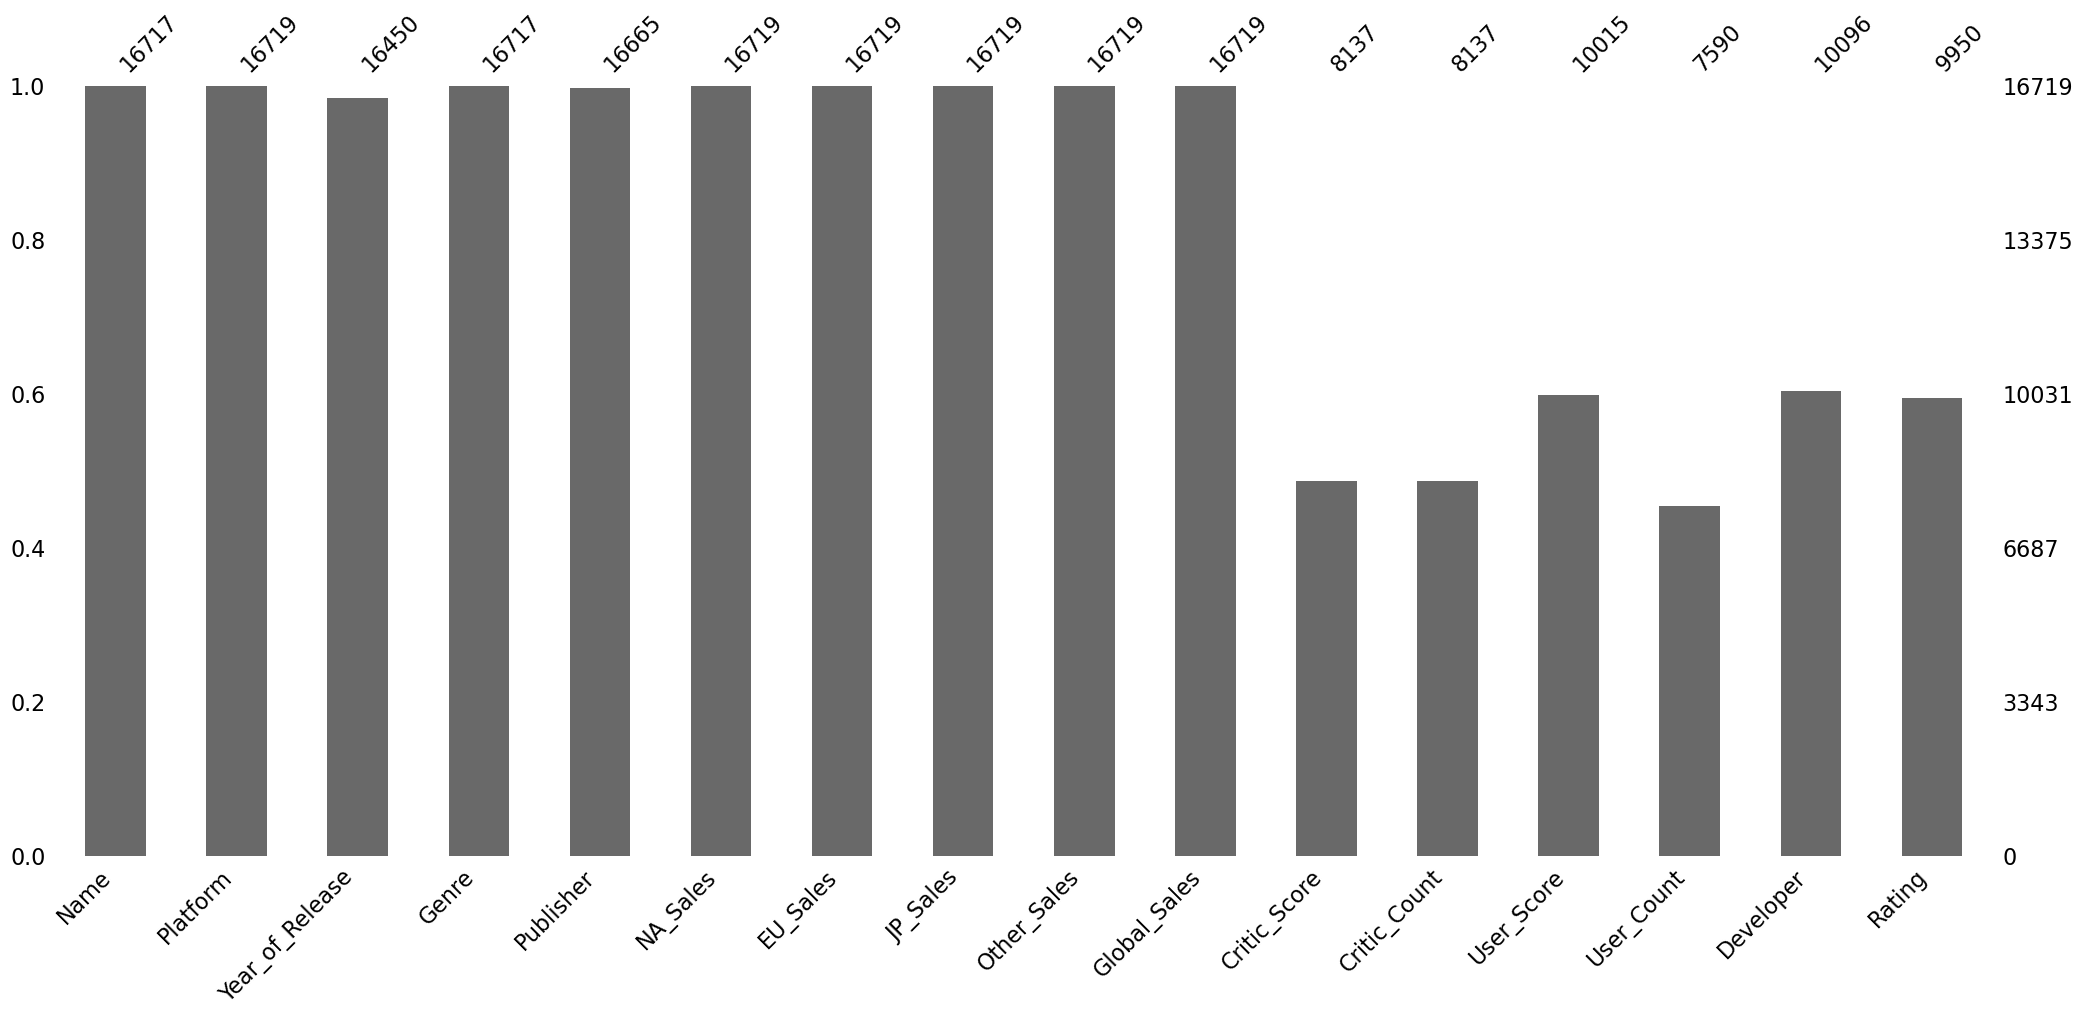

In [8]:
msno.bar(df, n=16719)

In [9]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [10]:
df.describe(include="object")

Name Platform   Genre        Publisher  \
count                         16717    16719   16717            16665   
unique                        11562       31      12              581   
top     Need for Speed: Most Wanted      PS2  Action  Electronic Arts   
freq                             12     2161    3370             1356   

       User_Score Developer Rating  
count       10015     10096   9950  
unique         96      1696      8  
top           tbd   Ubisoft      E  
freq         2425       204   3991

In the above code there are a number of observations which will need to be addressed before Visulation
* 10 of the features has missing values
* In addition to having some NaN values there are 96 "tbd" values in User_Score which causes this feature to be object as oppose to be a numeric feature that would be needed for many of visualisation you would use for a feature about game scores.
* User_Score is 0-10 while Critic_Score is 0-100 if they both had the same scale it'll be easier to compare them
* Year_of_Release is a float but it would be more ideal for visualisations to be an interger 
* Simularly to Year_of_Release, User_Count, Critic_Count and Critic_Score features are floats when it'll better to be intergers
* The values in the Sales features are in tens when sales are would in reality be in millions

In [11]:
df.loc[df["User_Score"]=="tbd"]

Name Platform  Year_of_Release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16699                           Planet Monsters      GBA           2001.0   
16701                          Bust-A-Move 3000       GC           2003.0   
16702                          Mega Brain Boost       DS           2008.0   
16708                                  Plushees       DS           2008.0   
16710             Men in Black II: Alien Escape       GC           2003.0   

            Genre                     Publisher  NA_Sales  EU_Sales  JP_Sales  \
119        Sports                     505 Games      3.45      2.59       0.0   
301          Misc            Namco Bandai Games      2.08      1.35       0.0   
520        Sports         Majesco Entertainment      1.51      1.03       0.0   
645          Misc                           THQ      1.65      0.57       0.0   
657     Adventure  Konami Digital Entertainment      2.15      0.18       0.0   
...           ...                           ...       ...       ...       ...   
16699      Action                         Titus      0.01      0.00       0.0   
16701      Puzzle                       Ubisoft      0.01      0.00       0.0   
16702      Puzzle         Majesco Entertainment      0.01      0.00       0.0   
16708  Simulation                     Destineer      0.01      0.00       0.0   
16710     Shooter                    Infogrames      0.01      0.00       0.0   

       Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
119           0.66          6.71           NaN           NaN        tbd   
301           0.54          3.98          61.0          21.0        tbd   
520           0.27          2.81           NaN           NaN        tbd   
645           0.20          2.42          71.0           9.0        tbd   
657           0.07          2.39          73.0           4.0        tbd   
...            ...           ...           ...           ...        ...   
16699         0.00          0.01          67.0           9.0        tbd   
16701         0.00          0.01          53.0           4.0        tbd   
16702         0.00          0.01          48.0          10.0        tbd   
16708         0.00          0.01           NaN           NaN        tbd   
16710         0.00          0.01           NaN           NaN        tbd   

       User_Count                             Developer Rating  
119           NaN              Pipeworks Software, Inc.      E  
301           NaN                       Digital Eclipse   E10+  
520           NaN                Majesco Games, Majesco      T  
645           NaN                                   THQ      E  
657           NaN  Konami Computer Entertainment Hawaii      E  
...           ...                                   ...    ...  
16699         NaN                    Planet Interactive      E  
16701         NaN                     Taito Corporation      E  
16702         NaN                    Interchannel-Holon      E  
16708         NaN                        Big John Games      E  
16710         NaN                                 Atari      T  

[2425 rows x 16 columns]

In [12]:
missing_data=["tbd"]
df=pd.read_csv("vgsales.csv",na_values=missing_data)

In [13]:
df.dropna(subset=["Name","Year_of_Release","Genre","Publisher"],inplace= True)

In [14]:
df.shape

(16416, 16)

Above I have converted the "tbd" values into regular NaN values. For the "Name","Year_of_Release","Genre" and "Publisher" feature they have a small amount of Missing values, which the largest of these, "Year_of_Release", only being 1.6% of the overall observations. Given this I've decised to drop these obersations. This reduces the total observations to 16,416 which is a reduction of 1.8%. This samll reduction to acceptable as it have a limited impact on the data

In [15]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

<Axes: xlabel='Critic_Score', ylabel='Count'>

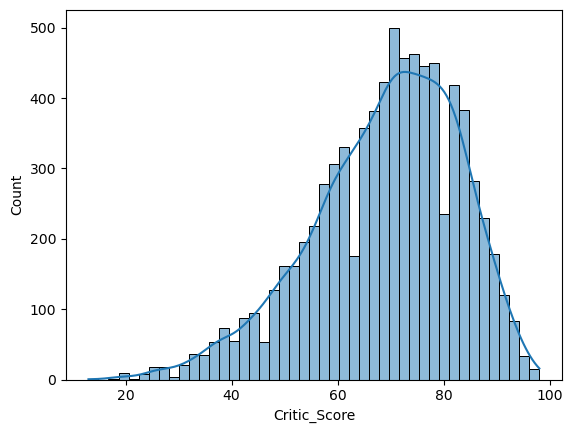

In [16]:
sns.histplot(df,x="Critic_Score", kde=True)

<Axes: xlabel='Critic_Count', ylabel='Count'>

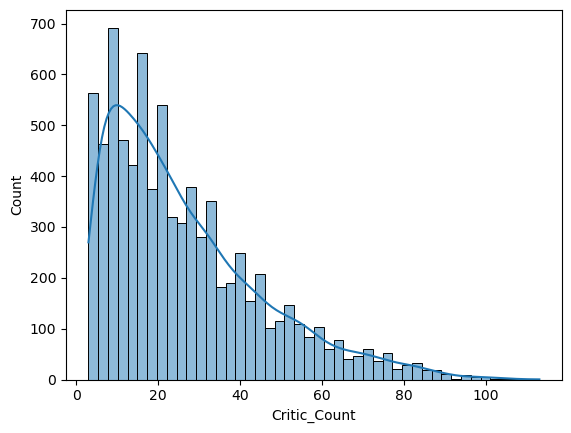

In [17]:
sns.histplot(df,x="Critic_Count", kde=True)

<Axes: xlabel='User_Count', ylabel='Count'>

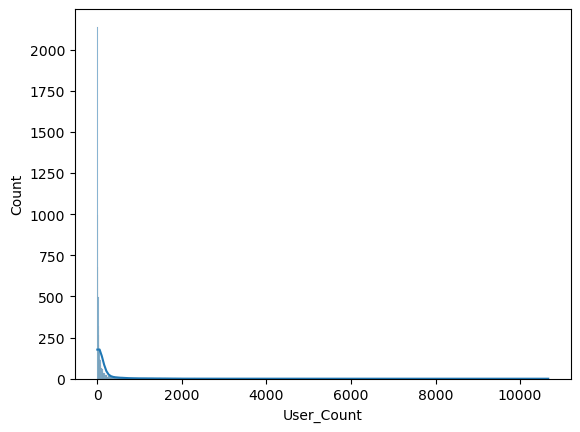

In [18]:
sns.histplot(df,x="User_Count", kde=True)

<Axes: xlabel='User_Score', ylabel='Count'>

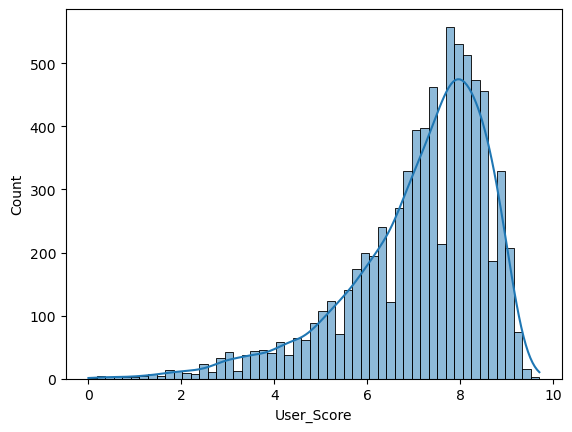

In [19]:
sns.histplot(df,x="User_Score", kde=True)

In [20]:
df["Critic_Count"].fillna(df["Critic_Count"].median(), inplace=True)
df["Critic_Score"].fillna(df["Critic_Score"].median(), inplace=True)
df["User_Count"].fillna(df["User_Count"].median(), inplace=True)
df["User_Score"].fillna(df["User_Score"].median(), inplace=True)

In [21]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6512
Rating             6649
dtype: int64

The above 4 graphs show that "Critic_Score", "Critic_Count", "User_Score" and "User_Count" are skewed. For data that is skewed it is more suitable to replace the Null values with the median over the mean, which I have done above. The remaining Features with NaN values are "Developer" and "Rating", given these are both Categorical Data. It would be losing too much data to just simply drop them. I could convert them into them own category ie put hem in a Other or Unknown category, but where I to do that, when I do begin to visulise the data based on the features it would create only noise, which will limited insights that we would gain from seeing graph with 6,000 plus missings Values. I've therefore decided to leaves these NaN values alone, and should there be any work carried out on these features, i'll then exclude the NaN values from those specific Visulation.   

In [22]:
df["User_Score"]=df["User_Score"]*10
df["NA_Sales"]=df["NA_Sales"]*1000000
df["EU_Sales"]=df["EU_Sales"]*1000000
df["JP_Sales"]=df["JP_Sales"]*1000000
df["Other_Sales"]=df["Other_Sales"]*1000000
df["Global_Sales"]=df["Global_Sales"]*1000000

In [23]:
df['Year_of_Release']=df['Year_of_Release'].astype(int)
df['Critic_Count']=df['Critic_Count'].astype(int)
df['Critic_Score']=df['Critic_Score'].astype(int)
df['User_Count']=df['User_Count'].astype(int)
df["User_Score"]=df["User_Score"].astype(int)

In [24]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii             2006        Sports  Nintendo   
1         Super Mario Bros.      NES             1985      Platform  Nintendo   
2            Mario Kart Wii      Wii             2008        Racing  Nintendo   
3         Wii Sports Resort      Wii             2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing  Nintendo   

     NA_Sales    EU_Sales    JP_Sales  Other_Sales  Global_Sales  \
0  41360000.0  28960000.0   3770000.0    8450000.0    82530000.0   
1  29080000.0   3580000.0   6810000.0     770000.0    40240000.0   
2  15680000.0  12760000.0   3790000.0    3290000.0    35520000.0   
3  15610000.0  10930000.0   3280000.0    2950000.0    32770000.0   
4  11270000.0   8890000.0  10220000.0    1000000.0    31370000.0   

   Critic_Score  Critic_Count  User_Score  User_Count Developer Rating  
0            76            51          80         322  Nintendo      E  
1            71            22          75          24       NaN    NaN  
2            82            73          83         709  Nintendo      E  
3            80            73          80         192  Nintendo      E  
4            71            22          75          24       NaN    NaN

The final part of the EDA is some Feature Engineering to make some feature more appropiate for the visulation. I've have:
* Multiplied the User_Score by 10 to bring it to a rating scale of 0-100 which is in line with the Critic_Score
* Multiplied the Sales features by 1 million to show the actual sales amounts
* Converted the Year_of_Release, Critic_Count, Critic_Score, User_Count and User_Score feature into intergers so they can be more visually appealing on the below graphs

# Question 1 Part 1
What are the top 5 games by global sales?  

In [25]:
dfQ1_1=df.nlargest(5,"Global_Sales",keep="all")

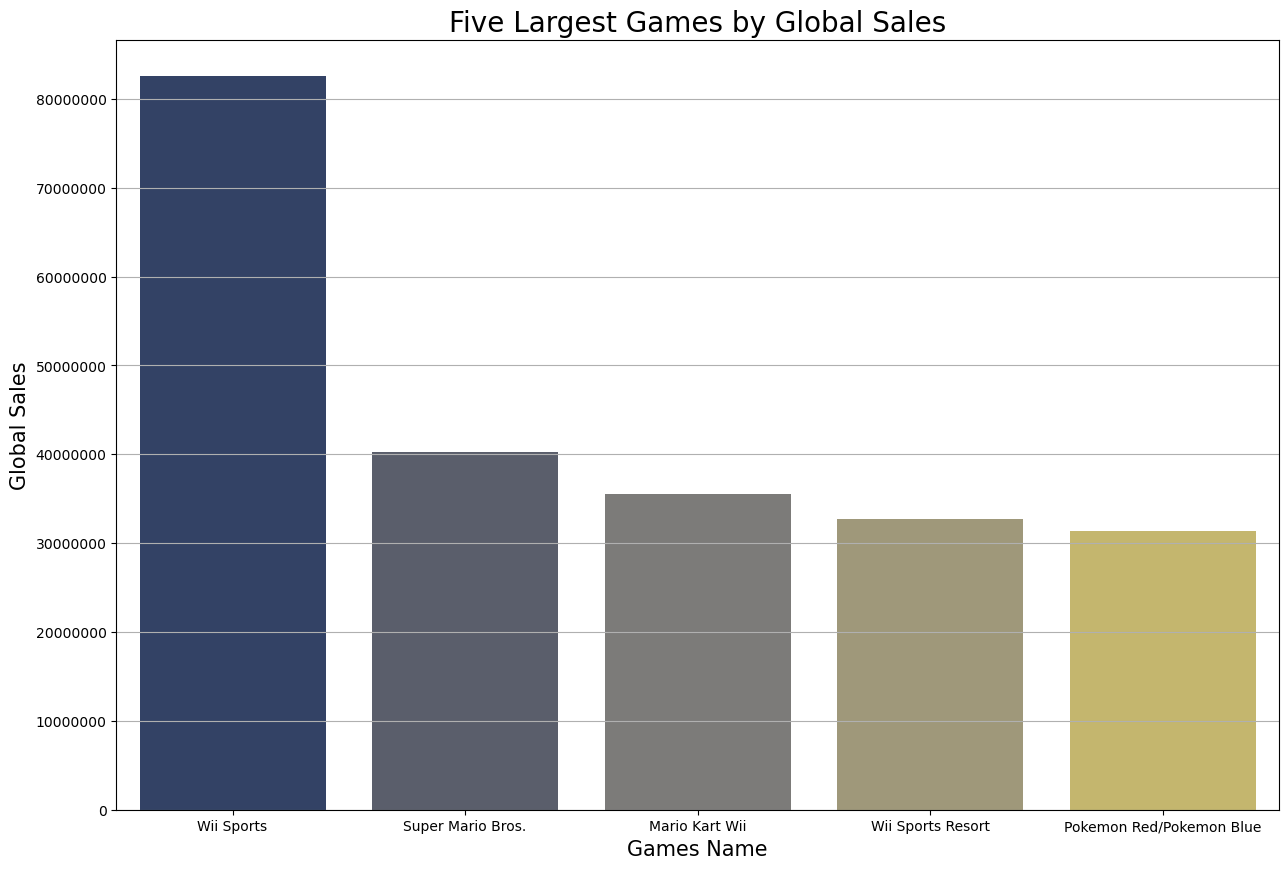

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(dfQ1_1,x="Name",y="Global_Sales",palette="cividis")
plt.title("Five Largest Games by Global Sales",fontsize=20)
plt.xlabel("Games Name",fontsize=15)
plt.ylabel("Global Sales",fontsize=15)
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis="y");

For this Visualtion I started with creating a new dataframe. This dataframe is formed using the panada function, .nlargest using "Global Sales" as the column parameter. 

For the graph itself I used a Bar chart given that "Games names" is nominal data. I used the matplotlib code: plt.ticklabel_format as the Y axis defaulted to a scienfic number. Given that the the X axis is quite long I've used the matplotlib code: plt.grid(axis="y"), so the end user can more easily read the Global Sales of the games on the far right of the X axis. I've used the colour pallette "cividis" as it is a friendly colour palette for people who have red-green colour blindness, which is the most common colour blindness. (Fernández-Barral,2020).

## Question 1 Part 2
Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

In [27]:
dfQ1_2=df[(df["Year_of_Release"]>=2010) & (df["Year_of_Release"]<=2014)]
dfQ1_2.sort_values(by=["Year_of_Release"], inplace= True)

In [28]:
xmin,xmax=min(dfQ1_2["NA_Sales"]),max(dfQ1_2["NA_Sales"])
ymin,ymax=min(dfQ1_2["JP_Sales"]),max(dfQ1_2["JP_Sales"])

In [29]:
fig1=px.scatter(dfQ1_2,x="NA_Sales",y="JP_Sales",animation_frame="Year_of_Release",
              hover_name="Name",height=700,title="North American Sale vs Japenese Sales form 2010-2014",
              range_x=[xmin,xmax], range_y=[ymin,ymax])

fig1.update_xaxes(title_text='North Amercian Sales')
fig1.update_yaxes(title_text='Japanese Sales')
fig1.show()

In [30]:
fig2=px.scatter(dfQ1_2,x="NA_Sales",y="JP_Sales",animation_frame="Year_of_Release",
              hover_name="Name",height=1000,title="North American Sale vs Japenese Sales form 2010-2014",
              range_x=[0,1000000], range_y=[0,1000000])
fig2.update_xaxes(title_text='North Amercian Sales')
fig2.update_yaxes(title_text='Japanese Sales')
fig2.show()

I started by creating a new Dataframe which pulls all the Observation that has a "Year Of Release" that is between 2010 and 2014. I then sorted the Dataframe by "Year Of Release" so the scroll bar will be in order.

To display the correlation between North American and Japanese sales I've used a Scatterplot. However the static scatter plot done with Seaborn was difficulty to read, even when you resized the graph and put a limited the the x and yaxis to 1,000,000. (See appendix 1). So I chosen to add a interactive scatter graph using plotly. With this graph I've used the feature "Year_of_Release" as the animation_frame parameter so the end user can easiliy separate each year data from each other. I'Ve also used "Name" in the hover_name parameter,so if a particualr point say the end user want to learn more about, say the exterme outlier in Fig 1, they can easily identify it themselves without needing any coding insight or referring a query back to the source of the graph or data holder.

Althought the data is less messy then it was with a seaborn plot, given that the majority of games have less than 1 million  North American and Japense Sales the data is still difficulty to view the games adn trend for games under 1 million sales in Noth American and Japense Sales. In an attempt to resolve this I've recreted th graph but limited the x and y axis to 1 million. I've also changed the heigh of this graph to 1,000 pixels, as both axis hae the same max limit so teh graph is innately more appealing if the axis are th same size. I've chossing to keep the orginial graph as the client, a retailer company, should want to know the high end outlier for sales as these will likely be signifcant to sale goals, either by being games that will sale more and/or be products that will attract a wider customer base.  

From Fig 2 you can see that there is some positive correlation between Noth American and Japense Sales eept for in 2014. but there are also many games that have zero sale in Noth America or Japan

# Question 1 Part 3
What is the distribution of the most popular 4 game genres?  

In [31]:
df["Genre"].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

In [32]:
Action=df[df["Genre"]=="Action"]
Sports=df[df["Genre"]=="Sports"]
Role_Playing=df[df["Genre"]=="Role-Playing"]
Shooter=df[df["Genre"]=="Shooter"]

In [33]:
dfQ1_3=pd.concat([Action,Sports,Role_Playing,Shooter])
dfQ1_3=pd.DataFrame(dfQ1_3)

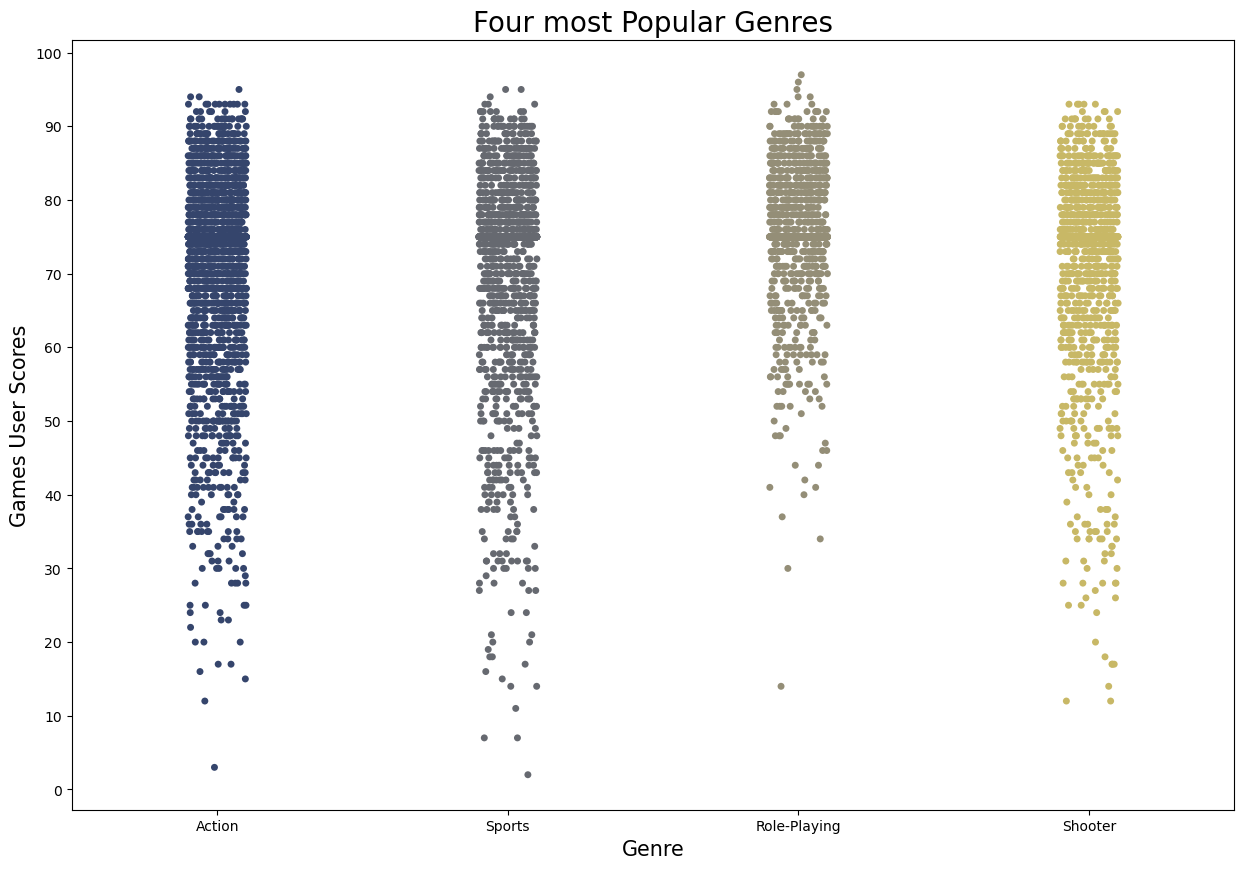

In [34]:
plt.figure(figsize=(15,10))
sns.stripplot(dfQ1_3,x="Genre", y="User_Score", palette="cividis")
plt.title("Four most Popular Genres",fontsize=20)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Games User Scores",fontsize=15)
plt.yticks(np.arange(0,110,10));

To create the datafrmae form this question I used the panada function .value_count() to find the 4 largest genres these are "Action", "Sports", "Role-Playing" and "Shooter". The category "Misc" has the second highest count but given that this isn't a true genre and just a placeholder for game with no other genre, I've excluded it when forming my new dataframe. With these 4 genres identified I create 4 indivdual series and that concat these into the one Datframe.

Once again I've used the "cividis" colour palette for the benefit of end users who red-green colour blind. I've also is the Matplotlib code yticks(np.arange(0,110,10)) so that the Y axis will show where the 100 score tick is on the graph.

For the graph itself, I've chosen to use a Strip plot. My Y axis is the user score as I'm using the score that user of the games give to define what is popular. Using a Strip plot as you can see the score of all the games within each genre. From this graph you can see in each of the genres the majority of the games scores are between 70-90 out of 100, with Role-Playing games having the highest lowes of the genres, while also having as highest of the high.   

# Question 1 Part 4
Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

In [35]:
dfQ1_4=df.groupby("Year_of_Release")["EU_Sales"].mean()
dfQ1_4=pd.DataFrame(dfQ1_4)
dfQ1_4.reset_index(inplace=True)

In [36]:
col=["orange" if year<2006 else "blue" for year in dfQ1_4["Year_of_Release"]]

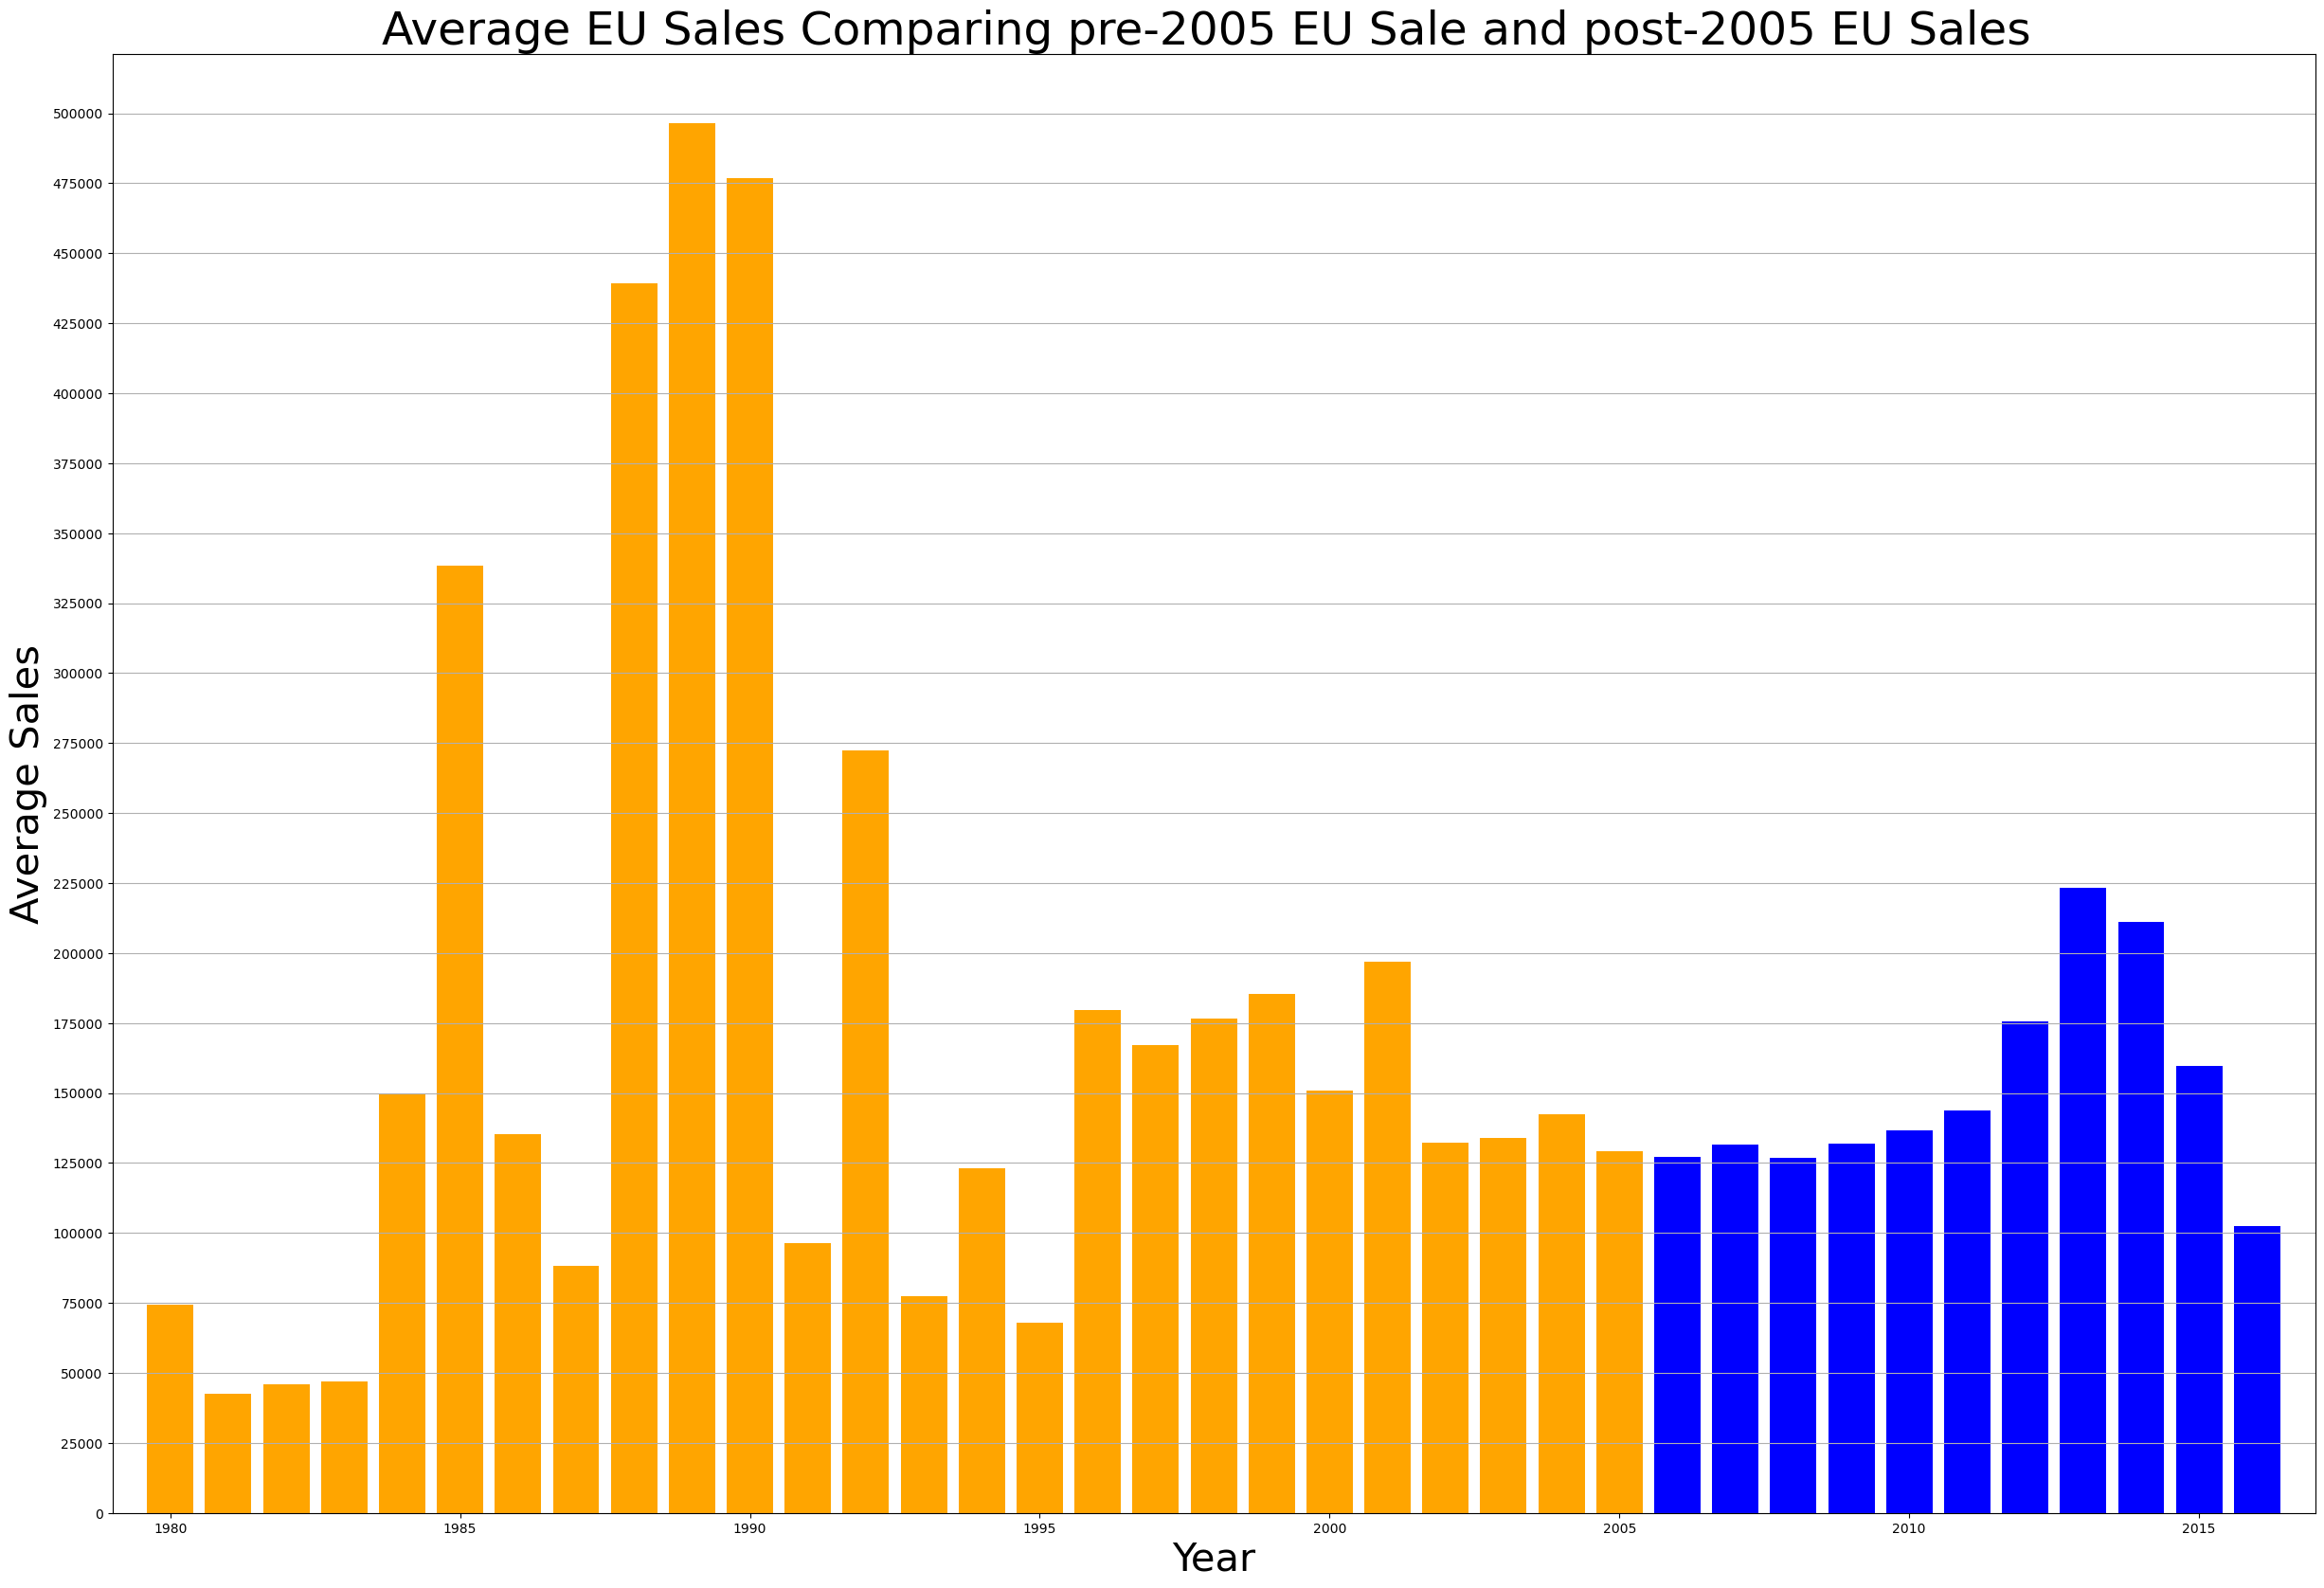

In [37]:
plt.figure(figsize=(30,20))
plt.bar(dfQ1_4["Year_of_Release"],dfQ1_4["EU_Sales"],color=col)
plt.title("Average EU Sales Comparing pre-2005 EU Sale and post-2005 EU Sales ",fontsize=35)
plt.xlabel("Year",fontsize=30)
plt.ylabel("Average Sales",fontsize=30)
plt.xlim(1979,2017)
plt.yticks(np.arange(0,520000,25000))
plt.grid(axis="y");

I've created the new dataframe for this question by using the pandas function .groupby to group the data by the feature "Year Of Release" by the mean of EU Sales.

To clearly show the bars that represent the years 2005 and before and years after 2005 I've created a colour palette the colour the years form 2005 and below in orange and the years above 2005 in blue. I've used this colour scheme, as oppose to "cividis" again, as these are complementary colours to each other, meaning that they are on opposite ends on the color wheel. This make this rather long graph more pleasant to view. In addition to this colour scheme to help with the long graph I've used the Matplotlib code plt.grid(axis="y"), so the end user can easily trace what the Y-axis values are for the bars on the far right of the graph. 

To answer the question posed in this section. The years with the average sale was during years 1988-1990, but it has had dramatic drop. For the years after 2005 it is comparable to the years closer to the end of the older game era.

# Question 1 Part 5
What are the 3 most common “developer” in the dataset?  

In [38]:
dfQ1_5 = pd.DataFrame({"Number of Games":df["Developer"].value_counts()})
dfQ1_5.reset_index(inplace=True)
dfQ1_5.rename(columns={"index":"Developer"}, inplace=True)
dfQ1_5=dfQ1_5.nlargest(3,"Number of Games",keep="all")
dfQ1_5

Developer  Number of Games
0    Ubisoft              201
1  EA Sports              169
2  EA Canada              164

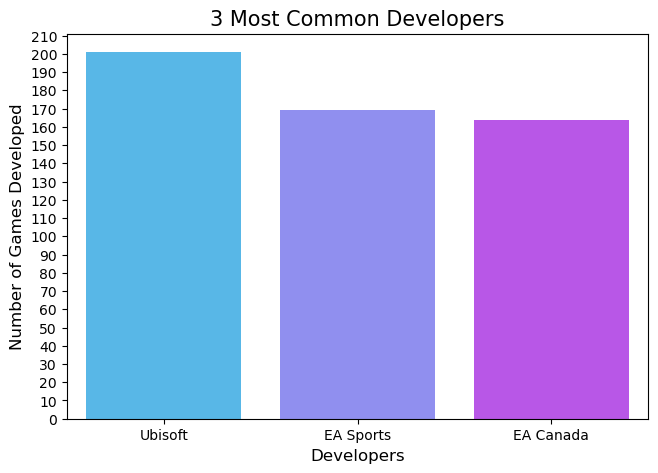

In [39]:
plt.figure(figsize=(7.5, 5))
sns.barplot(dfQ1_5,x="Developer", y="Number of Games",palette="cool") 
plt.title("3 Most Common Developers",fontsize=15)
plt.xlabel("Developers",fontsize=12) 
plt.ylabel("Number of Games Developed",fontsize=12)
plt.yticks(np.arange(0,220,10));

For this Visualtion I started with creating a new dataframe. This dataframe is formed using the pandas function, value_counts on teh Developer feature, the index defult to the developer names so I've used the pandas funchtions .reset_index and .rename to make the first feature the Developer's names. Finally I used the .nlargest function to remove all developer besides the 3 largest ones, Ubisoft, EA Sports and EA Canada. 

For the graph itself I've used a Bar chart given that "Developers" is nominal data. I've used the code plt.yticks(np.arange(0,220,10) just to make it clearer that Ubisoft Number of games is above 200. I've opted to use the "cool" color palette as it contains 3 colours that are next to each other in the colour wheel. As pre the analogous colours, colour theory.  

# Question 2

In [40]:
df["Platform"].value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [41]:
PS2=df[df["Platform"]=="PS2"] 
DS=df[df["Platform"]=="DS"] 
PS3=df[df["Platform"]=="PS3"] 
Wii=df[df["Platform"]=="Wii"]
X360=df[df["Platform"]=="X360"]

In [42]:
dfQ2=pd.concat([PS2,DS,PS3,Wii,X360]) 
dfQ2=pd.DataFrame(dfQ2)
dfQ2.head()

Name Platform  Year_of_Release   Genre  \
17  Grand Theft Auto: San Andreas      PS2             2004  Action   
24    Grand Theft Auto: Vice City      PS2             2002  Action   
28         Gran Turismo 3: A-Spec      PS2             2001  Racing   
38           Grand Theft Auto III      PS2             2001  Action   
48                 Gran Turismo 4      PS2             2004  Racing   

                      Publisher   NA_Sales   EU_Sales   JP_Sales  Other_Sales  \
17         Take-Two Interactive  9430000.0   400000.0   410000.0   10570000.0   
24         Take-Two Interactive  8410000.0  5490000.0   470000.0    1780000.0   
28  Sony Computer Entertainment  6850000.0  5090000.0  1870000.0    1160000.0   
38         Take-Two Interactive  6990000.0  4510000.0   300000.0    1300000.0   
48  Sony Computer Entertainment  3010000.0    10000.0  1100000.0    7530000.0   

    Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
17    20810000.0            95            80          90        1588   
24    16150000.0            95            62          87         730   
28    14980000.0            95            54          84         314   
38    13100000.0            97            56          85         664   
48    11660000.0            89            74          85         272   

            Developer Rating  
17     Rockstar North      M  
24     Rockstar North      M  
28  Polyphony Digital      E  
38         DMA Design      M  
48  Polyphony Digital      E

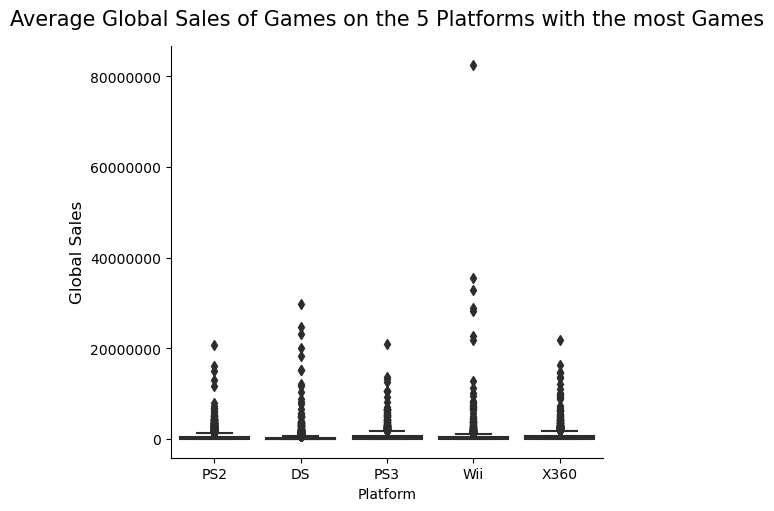

In [43]:
sns.catplot(x="Platform", y="Global_Sales", kind = "box", data=dfQ2, palette="cividis")
plt.title("Average Global Sales of Games on the 5 Platforms with the most Games",fontsize=15, pad=15)
plt.xlabel("Platform",fontsize=10) 
plt.ylabel("Global Sales",fontsize=12)
plt.ticklabel_format(style="plain",axis="y");

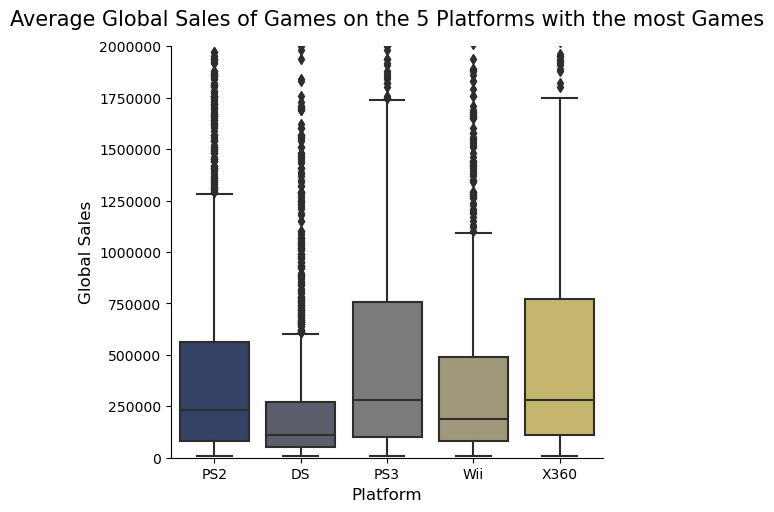

In [44]:
sns.catplot(x="Platform", y="Global_Sales", kind = "box", data=dfQ2,palette="cividis")
plt.title("Average Global Sales of Games on the 5 Platforms with the most Games",fontsize=15, pad=15)
plt.xlabel("Platform",fontsize=12) 
plt.ylabel("Global Sales",fontsize=12)
plt.ylim(0,2000000)
plt.ticklabel_format(style="plain",axis="y");

The "Staticital Relevant" question I'm asking is" What is the Average and Variations in Global sales for the most common Platforms games are created for." 

To create the dataframe form this question I used the panada function .value_count() to find the 5 most common Platforms which are PS2, DS, PS3, Wii and X360 With these 5 Platforms identified I've create 5 indivdual series and that concat these into the one Dataframe.

I've used the Box plot as a box plot will show the median global sale of games for each Platforms along with the the range of the midle 50% of the game sales and then the lower and higher ranges along with any Outliners. As youe can see from first graph there are many outliers with in these Platforms, with one game for the Wii (we learned in Question 1 part 1 that this is Wii Sport), being so should a signicant outlier that the box themselves are squeshed. 

Although knowing the higher end outliers has value of the client, we are unable to derive any data of the box, so I've used teh matplotlib code plt.ylim(0,2000000) to limit the value on the y axis to 2,000,000 so the box is easier to read. Once again I've used the "cividis" colour palette for the benefit of end users who red-green colour blind.

From the second graph you can see that the DS has the smaller average sales but also has the smallest variation gobal sale of games. X360, followed closly by PS3 has the higher average sales but also the largest variation. All Platform have lower range end at 0, means all Platforms have games that do not sell. The company can now use this info to inform it self which platform and gamed for that platform it want to slae, based on it's own risk appitide. 

# Appendix

### Seaborn graphs that weren't suitable for Quetion 1 part 2: Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?

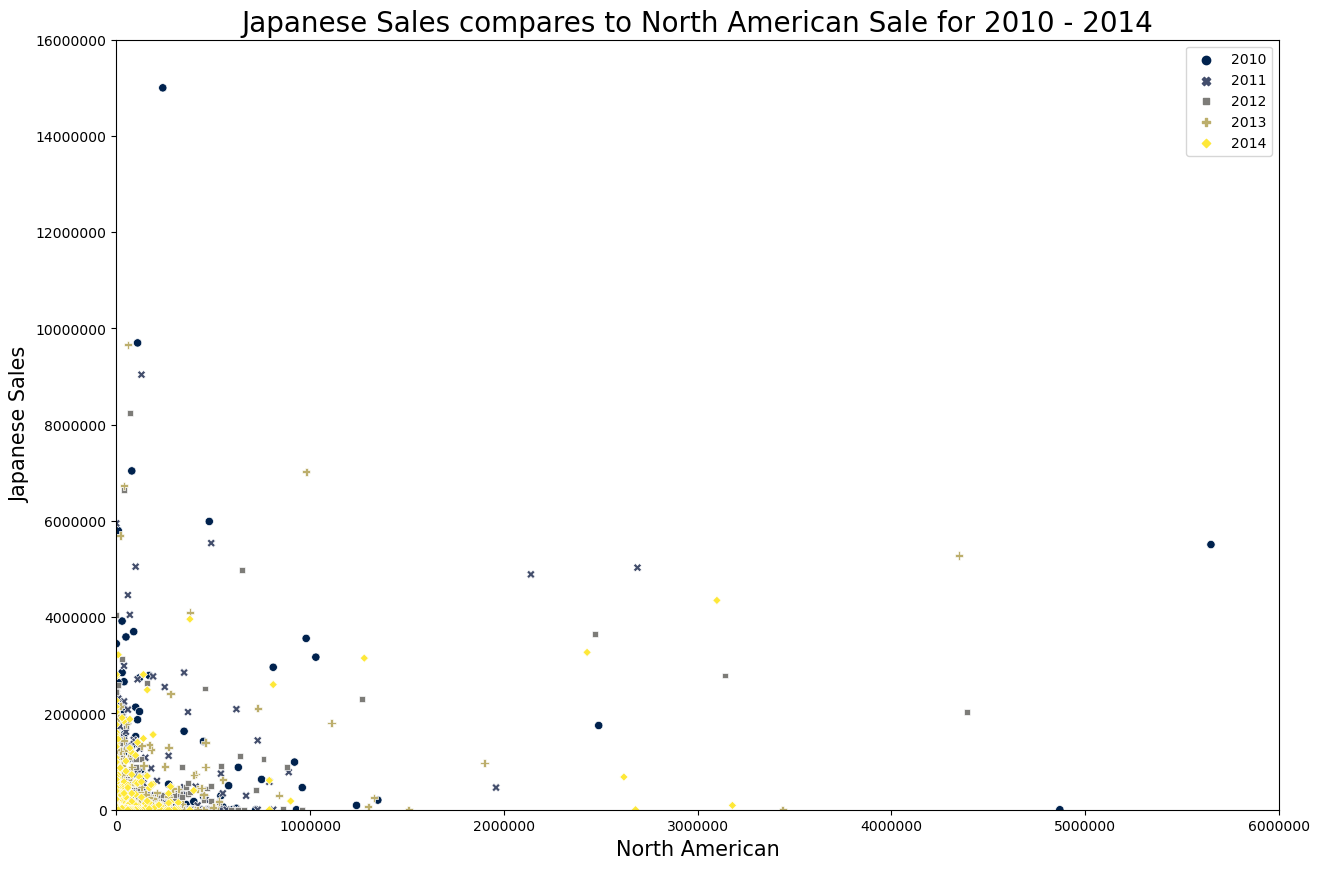

In [45]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release", palette="cividis", style="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xlim(0,6000000)
plt.ylim(0,16000000)
plt.ticklabel_format(style="plain");

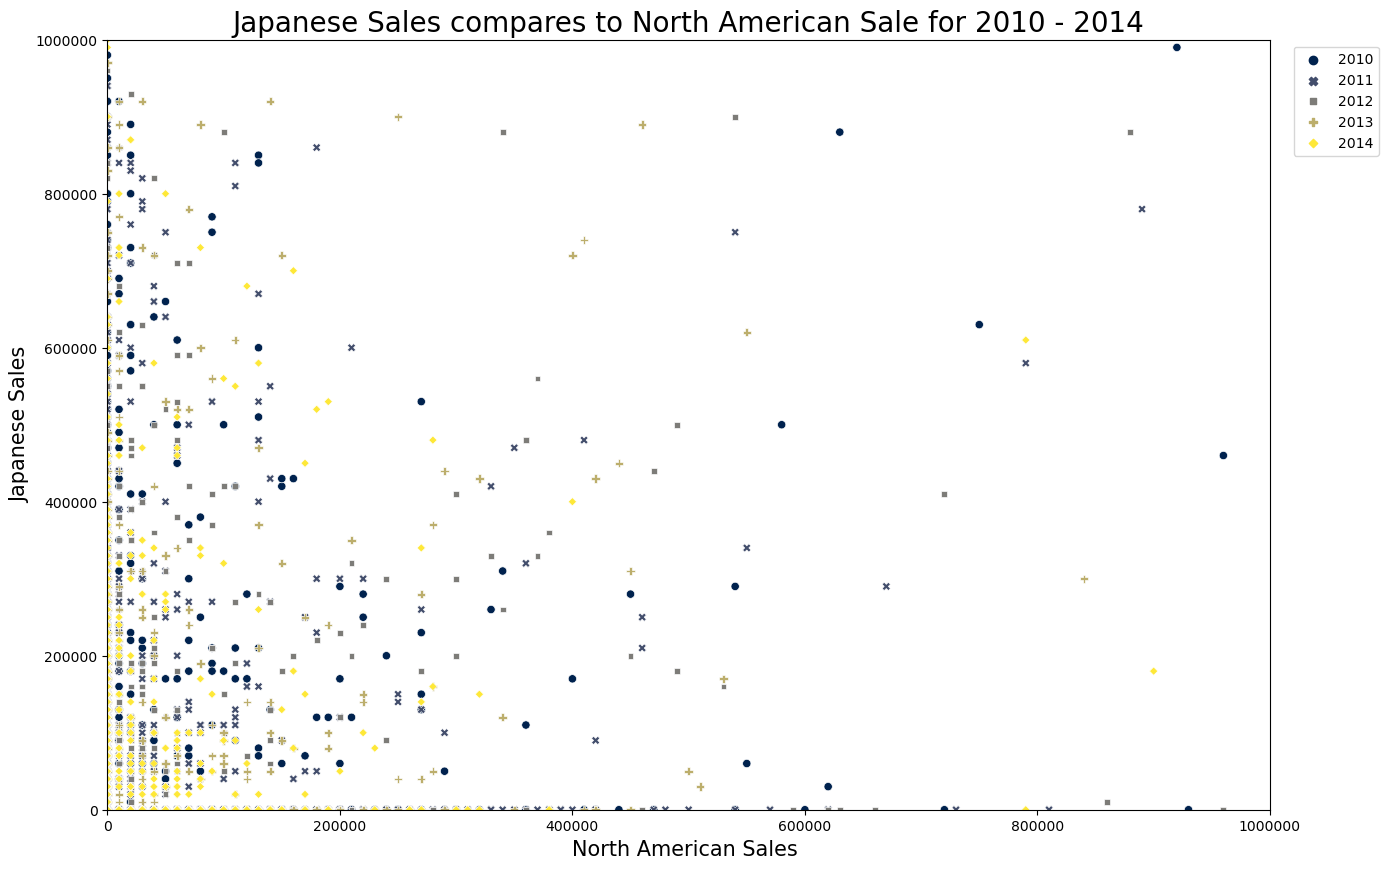

In [46]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release",palette="cividis", style="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American Sales ",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.xlim(0,1000000)
plt.ylim(0,1000000)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.ticklabel_format(style="plain");

# Reference list

Fernández-Barral, A. (2020). BEST PRACTICES FOR COLOUR BLIND FRIENDLY PUBLICATIONS & DESCRIPTIONS. [online] https://www.cta-observatory.org/, CTAO Astrodiversity Project, pp.1–5. Available at: https://www.cta-observatory.org/wp-content/uploads/2023/05/CTAO_ColourBlindFriendlyPractices_Oct2020.pdf [Accessed 2 Apr. 2024].